# Contextual Image Segmentation Techniques

Let's look at applying clustering on image for segmentation. Let's look at segmenting color images for this case.

In [27]:
# importing libraries

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import animation, rc
from ipywidgets import interact, widgets
import matplotlib.animation as animation
from IPython.display import HTML, display
%matplotlib inline

In [28]:
# reading image using opencv

image = cv2.imread('..//images//jaipur-2.jpg')
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (1365, 2048, 3)


In [29]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (1365, 2048)


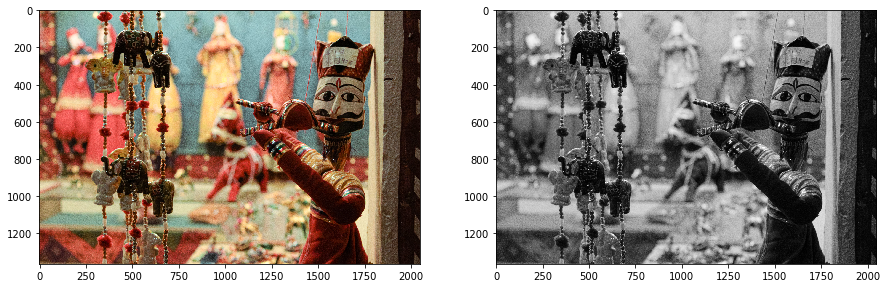

In [30]:
f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].imshow(image)
ax[1].imshow(image_g, cmap = 'gray')
plt.show()

In [31]:
image_data = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
imdf = pd.DataFrame(data = image_data, columns = ['r', 'g', 'b'])

In [32]:
imdf.head()

,r,g,b
0,207,131,95
1,203,131,93
2,209,135,98
3,198,118,81
4,205,125,88


In [33]:
kmeans = KMeans(5)
kmeans.fit(imdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
imdf.loc[:, 'cluster'] = kmeans.labels_

In [35]:
imdf['cluster'].value_counts()

0    654773
2    581032
1    572181
4    510239
3    477295
Name: cluster, dtype: int64

In [36]:
kmeans.cluster_centers_

array([[117.66980036,  69.90165527,  48.93044643],
       [222.10020171, 194.9979409 , 151.8177701 ],
       [ 43.49212589,  17.59258405,   8.58626583],
       [135.19196323, 165.85380113, 157.90441311],
       [191.20483813, 119.65000823,  88.94805032]])

In [37]:
clustermeans = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['rc', 'gc', 'bc'])
clustermeans.loc[:, 'cluster'] = clustermeans.index

In [38]:
imdf = imdf.merge(clustermeans, on = 'cluster', how = 'left')

In [39]:
image_cl = imdf[['rc', 'gc', 'bc']].values.reshape(image.shape[0], image.shape[1], image.shape[2])

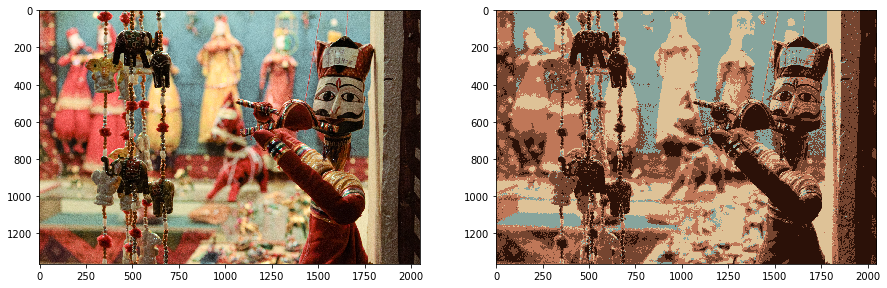

In [40]:
f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].imshow(image)
ax[1].imshow(image_cl/255, cmap = 'gray')
plt.show()